__Задача 1__

О непрерывной равномерно распределенной случайной величине `B` известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины `B` и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Дисперсия равномерно распределённой случайной величины равна $D(X) = \dfrac{(b - a)^2}{12}$, следовательно, зная левую границу, можно найти правую: $b = \sqrt{12\cdot D} + a = \sqrt{12\cdot 0.2} + 0.5 \approx 2.0492 $.

Тогда находим мат.ожидание: $M(X) = \dfrac{a + b}{2} = \frac{2.0492 + 0.5}{2} \approx 1.2746$

In [1]:
import numpy as np

a = 0.5
b = np.sqrt(12*0.2) + a
b

2.049193338482967

In [2]:
mean = (a + b) / 2
mean

1.2745966692414834

In [3]:
disp = (b - a)**2 / 12
disp

0.20000000000000004

In [4]:
samples = np.random.uniform(a, b, size=100000)

samples.mean()

1.275195636623775

In [5]:
samples.var(ddof=0)

0.19972324527807145

__Задача 2__

На сколько сигм (средних квадратических отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой `M(X) = 178` и `D(X) = 25`?

Учитывая, что дисперсия равна квадрату ср.квадратического отклонения, находим, что сигма в данной популяции = 5. Следовательно, рост человека, равный 190 см, отклоняется от мат.ожидания (178 см) на 2.4 сигмы.

__Задача 3__

Рост взрослого населения города `X` имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. Без использования сторонних библиотек (`numpy`, `scipy`, `pandas` и пр.) посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Для приблизительных расчётов можно использовать следующие правила:

* Интерквартильный размах содержит 50% её вероятностной массы.
* Интервал от $a - \sigma$ до $a + \sigma$ содержит около 68% вероятностной массы.
* От $a - 2\sigma$ до $a + 2\sigma$ — около 95% массы (__правило двух сигм__).
* От $a - 3\sigma$ до $a + 3\sigma$ — около 99.7% массы (__правило трёх сигм__).

1. рост > 182 см означает, что рост выходит за пределы интервала $a - \sigma$ до $a + \sigma$ справа. Т.е. вероятность можно рассчитать по формуле $\frac{1 - 0.68}{2} = 0.16$
2. рост > 190 см означает, что рост выходит за пределы интервала $a - 2\sigma$ до $a + 2\sigma$ справа. Т.е. вероятность можно рассчитать по формуле $\frac{1 - 0.95}{2} = 0.025$
3. рост от 166 см до 190 см означает, что рост попадает в интервал $a - \sigma$ до $a + 2\sigma$. Т.е. вероятность равна 0.68 + $\frac{0.95 - 0.68}{2} = 0.815$
4. рост от 166 см до 182 см означает, что рост попадает в интервал $a - \sigma$ до $a + \sigma$. Т.е. вероятность равна 0.68
5. рост от 158 см до 190 см означает, что рост попадает в интервал $a - 2\sigma$ до $a + 2\sigma$. Т.е. вероятность равна 0.95
6. рост не выше 150 см или не ниже 190 см означает, что рост выходит за рамки интервала $a - 3\sigma$ до $a + 2\sigma$. Т.е. вероятность равна $\frac{1 - 0.997}{2} + \frac{1 - 0.95}{2}$ = 0.0265
7. рост не выше 150 см или не ниже 198 см означает, что рост выходит за рамки интервала $a - 3\sigma$ до $a + 3\sigma$. Т.е. вероятность равна 1 - 0.997 = 0.003
8. рост < 166 см означает, что рост выходит за пределы интервала $a - \sigma$ до $a + \sigma$ слева. Т.е. вероятность можно рассчитать по формуле $\frac{1 - 0.68}{2} = 0.16$

In [6]:
import scipy.stats
from matplotlib import pyplot as plt

In [7]:
loc = 174
scale = 8

In [8]:
def normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

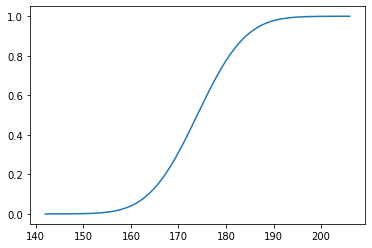

In [36]:
start = loc - 4 * scale
end = loc + 4 * scale
step = 0.1
heights_prob = {round(t, 1): sum([normal(loc, scale, x) * step for x in np.arange(start, t + step, step)]) for t in np.arange(start, end + step, step)}
n = len(heights_prob)

x_values = np.linspace(start, end, n)
plt.plot(x_values, list(heights_prob.values()))

In [44]:
print(f'рост > 182 см: {1 - heights_prob[182.0]}')
print(f'рост > 190 см: {1 - heights_prob[190.0]}')
print(f'рост от 166 см до 190 см: {heights_prob[190.0] - heights_prob[166.0]}')
print(f'рост от 166 см до 182 см: {heights_prob[182.0] - heights_prob[166.0]}')
print(f'рост от 158 см до 190 см: {heights_prob[190.0] - heights_prob[158.0]}')
print(f'рост не выше 150 см или не ниже 190 см: {heights_prob[150.0] + 1 - heights_prob[190.0]}')
print(f'рост не выше 150 см или не ниже 198 см: {heights_prob[150.0] + 1 - heights_prob[198.0]}')
print(f'рост < 166 см: {heights_prob[166.0 - step]}')

рост > 182 см: 0.15717692935312844
рост > 190 см: 0.022444936191535647
рост от 166 см до 190 см: 0.8174151839449201
рост от 166 см до 182 см: 0.6826831907833273
рост от 158 см до 190 см: 0.9544969240815017
рост не выше 150 см или не ниже 190 см: 0.02379186461910343
рост не выше 150 см или не ниже 198 см: 0.002700142295951835
рост < 166 см: 0.15711524580705546


In [12]:
scipy.stats.norm(loc, scale).sf(182)

0.15865525393145707

In [13]:
scipy.stats.norm(loc, scale).sf(190)

0.022750131948179195

In [14]:
scipy.stats.norm(loc, scale).sf(166) - scipy.stats.norm(loc, scale).sf(190)

0.8185946141203637

In [15]:
scipy.stats.norm(loc, scale).sf(166) - scipy.stats.norm(loc, scale).sf(182)

0.6826894921370859

In [16]:
scipy.stats.norm(loc, scale).sf(158) - scipy.stats.norm(loc, scale).sf(190)

0.9544997361036416

In [17]:
scipy.stats.norm(loc, scale).cdf(150) + scipy.stats.norm(loc, scale).sf(190)

0.024100029979809288

In [18]:
scipy.stats.norm(loc, scale).cdf(150) + scipy.stats.norm(loc, scale).sf(198)

0.0026997960632601866

In [19]:
scipy.stats.norm(loc, scale).cdf(166)

0.15865525393145707